In [4]:
import numpy as np
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# data augmentation
train_data = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip= True)

# defining training set
training_set = train_data.flow_from_directory('/content/drive/My Drive/IT/dataset/cat_and_dog/training_set' , batch_size=64,target_size=(224,224),class_mode = 'binary')


test_data= ImageDataGenerator(rescale= 1./255)
#defining testing set
testing_set= test_data.flow_from_directory('/content/drive/My Drive/IT/dataset/cat_and_dog/test_set' , batch_size=64,target_size=(224,224),class_mode = 'binary')

# build model
#model = Sequential()

# model.add(Conv2D(filters=32, kernel_size=3,input_shape=[64,64,3] , activation='relu'))
# model.add(MaxPooling2D(pool_size=2, strides=2))

# model.add(Conv2D(filters=64, kernel_size=3,activation='relu'))
# model.add(MaxPooling2D(pool_size=2, strides= 2))

# model.add(Conv2D(filters=128, kernel_size=3,activation='relu'))
# model.add(MaxPooling2D(pool_size=2, strides= 2))

vgg16 = VGG16(input_shape=(224,224,3), include_top=False, weights="imagenet")

for layer in vgg16.layers:
  layer.trainable= False

model= Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x=training_set, validation_data= testing_set, epochs=5)

In [ ]:
model.save('cat_dog.hdf5')

[[0.]]
cat


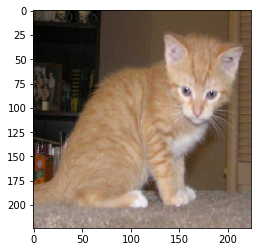

In [15]:
# Prediction
# [1,0] : dog
# [0,1] : cat

from tensorflow.keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt

img= image.load_img('/content/drive/My Drive/IT/dataset/cat_and_dog/test_set/cats/cat.4003.jpg', target_size= (224,224))
plt.imshow(img)

# convert PIL sang array
img= image.img_to_array(img)
img= np.expand_dims(img,axis=0)

model= load_model('cat_dog.hdf5')

result= model.predict(img)
print(result)

# round() : làm tròn 
if round(result[0][0]) ==0:
  pre = 'cat'
else:
  pre ='dog'

print(pre)